In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import Markdown, display

import pypesto
import pypesto.optimize as optimize
import pypesto.profile as profile
import pypesto.visualize as visualize
import pypesto.sample as sample

logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

from tqdm import tqdm
from PyPESTO.FRP import create_Lynd_v1
from PyPESTO.FRP.petab_ import plot_measurements
import numpy as np
%load_ext autoreload
%autoreload 2

The tests rely on tellurium to construct the models
Since tellurium is not installed the tests can't be run
If you want to run the tests, pip install tellurium first


In [2]:
amici_model, sbml_model_filepath = create_Lynd_v1.load_amici_from_sbml()

Creating SBML model (Lynd v1)
Creating species.
Generating parameters.
Creating reactions
Importing AMICI model from SBML


In [3]:
data_dir = '/SBML/PyPESTO/COMP/lynd_raw_data/'
data, metadata = create_Lynd_v1.get_plga_data(data_dir)#, indices=[0,1])
xdata_exp, ydata_exp = create_Lynd_v1.get_exp_data(data, metadata)

In [61]:
ydata_exp

[array([0.        , 0.18081399, 0.46757521, 0.52919273, 0.68695096,
        0.80614048, 0.80828634, 0.93062299, 0.95172819, 0.99207079,
        0.99897777, 0.99974893, 0.99991338, 0.99997868, 0.99999203,
        0.99999591, 0.99999798]),
 array([0.        , 0.05866512, 0.16699164, 0.19546748, 0.28311656,
        0.37392883, 0.37584597, 0.53124189, 0.57669687, 0.74523658,
        0.85666914, 0.9033279 , 0.92827629, 0.95162459, 0.96328977,
        0.96955601, 0.97503356]),
 array([0.        , 0.24716749, 0.38368823, 0.54056271, 0.6634567 ,
        0.80824128, 0.87478477, 0.94154996, 0.97159286, 0.99395578,
        0.99781206, 0.99956337, 0.99987382, 0.99997891, 0.99999002,
        0.9999971 , 0.99999888]),
 array([0.        , 0.08122338, 0.13221385, 0.20171836, 0.26927823,
        0.37688683, 0.44751445, 0.55434412, 0.63623067, 0.76456663,
        0.82304493, 0.88744764, 0.92055756, 0.95191549, 0.96100176,
        0.97242993, 0.97887079]),
 array([0.        , 0.26856841, 0.47459356, 0.57

In [30]:
objective = pypesto.Objective(
    fun=create_Lynd_v1.acqf_Lynd_v1_wrapper(data, metadata),
)

num_params = 7
lb = np.array([-2, -2, -2, 0, 0, 0, 0]).reshape(-1, 1)
ub = np.array([2, 2, 2, 1, 1, 1, 1]).reshape(-1, 1)

problem = pypesto.Problem(
    objective=objective, lb=lb, ub=ub,
    # x_fixed_indices=[2],
    # x_fixed_vals=[0],
    x_fixed_indices=[2, 3, 4, 5],
    x_fixed_vals=[0, 0, 0, 0]
)

optimizer_methods = [
    # 'L-BFGS-B',
    'Nelder-Mead',
    # 'Powell',
]

optimizer = optimize.ScipyOptimizer()#method='Powell')#method='Nelder-Mead')#method='Powell')
history_options = pypesto.HistoryOptions(trace_record=True)
engine = pypesto.engine.MultiProcessEngine()
n_starts = 100

results = []

for optimizer_method in optimizer_methods:
    optimizer = optimize.ScipyOptimizer(method=optimizer_method)
    result = optimize.minimize(
        problem=problem, 
        optimizer=optimizer, 
        n_starts=n_starts,
        engine=engine,
        history_options=history_options,
    )
    results.append(result)

# # run optimization of problem 1
# result = optimize.minimize(
#     problem=problem, 
#     optimizer=optimizer, 
#     n_starts=n_starts,
#     engine=engine,
#     history_options=history_options,
# )

Engine will use up to 8 processes (= CPU count).


100%|█████████████████████████████████████████| 100/100 [05:22<00:00,  3.23s/it]


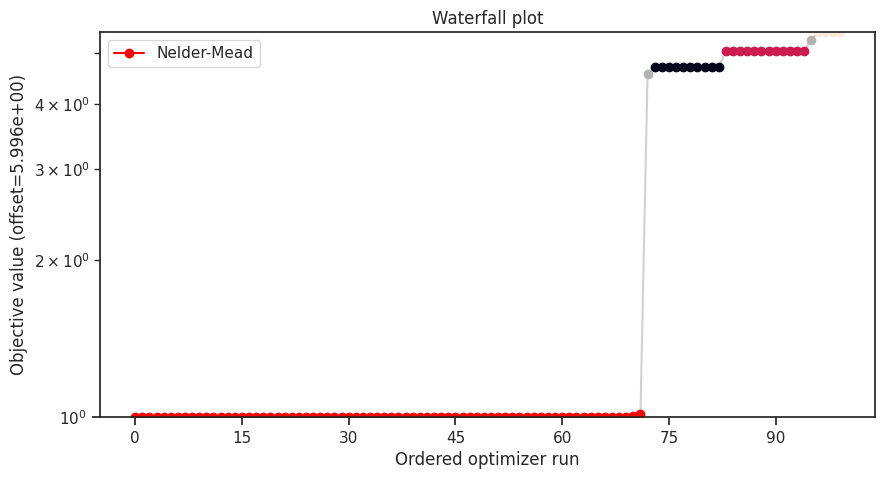

In [32]:
ax = visualize.waterfall(results, legends=optimizer_methods, size=(10,5))

In [36]:
nm_result_df = results[0].optimize_result.as_dataframe().copy()


# params = nm_result_df[nm_result_df['fval'] < -4]['x']
for p in params:
    print(p[:3], )

[ 0.53121783 -0.55188912  0.        ]
[ 0.53128446 -0.55186156  0.        ]
[ 0.53126186 -0.55186984  0.        ]
[ 0.53124987 -0.55186646  0.        ]
[ 0.53121865 -0.55187704  0.        ]
[ 0.53125575 -0.55186512  0.        ]
[ 0.53121644 -0.55187134  0.        ]
[ 0.53123122 -0.55187134  0.        ]
[ 0.53124774 -0.55186796  0.        ]
[ 0.53129251 -0.55186543  0.        ]
[ 0.53117372 -0.55190626  0.        ]
[ 0.53126308 -0.55186319  0.        ]
[ 0.53120986 -0.55189573  0.        ]
[ 0.5312653 -0.5518649  0.       ]
[ 0.53125625 -0.55185925  0.        ]
[ 0.5311866  -0.55189636  0.        ]
[ 0.53124686 -0.55188018  0.        ]
[ 0.5312573  -0.55186731  0.        ]
[ 0.53121647 -0.55187791  0.        ]
[ 0.53127828 -0.55185547  0.        ]
[ 0.53125429 -0.55187877  0.        ]
[ 0.53127041 -0.55186798  0.        ]
[ 0.53128766 -0.5518439   0.        ]
[ 0.53128138 -0.55184919  0.        ]
[ 0.53122456 -0.55189433  0.        ]
[ 0.53118284 -0.55189186  0.        ]
[ 0.53124217 -0

In [37]:
results[0].optimize_result.as_dataframe()['x'][0]

array([ 0.53121783, -0.55188912,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

array([<Axes: xlabel='Monomer Conversion', ylabel='Total Conversion'>,
       <Axes: xlabel='Monomer Conversion', ylabel='Total Conversion'>,
       <Axes: xlabel='Monomer Conversion', ylabel='Total Conversion'>,
       <Axes: xlabel='Monomer Conversion', ylabel='Total Conversion'>,
       <Axes: xlabel='Monomer Conversion', ylabel='Total Conversion'>],
      dtype=object)

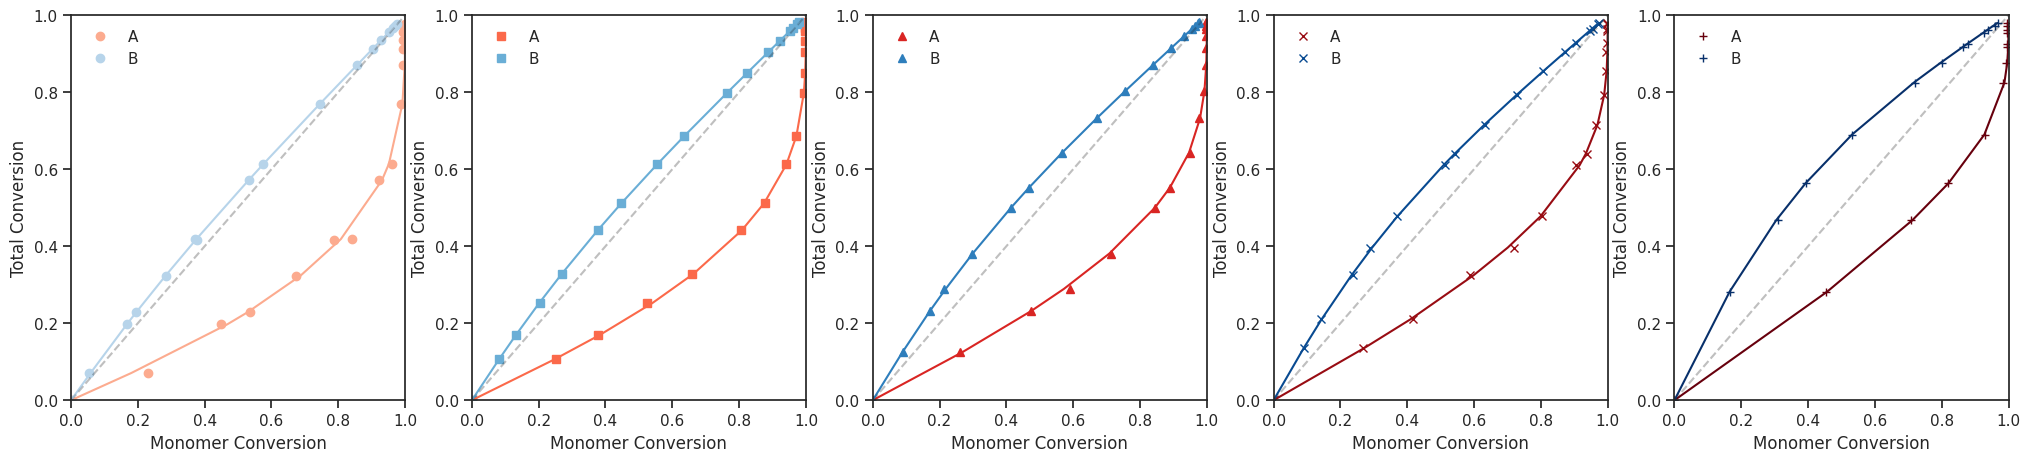

In [38]:
xdata_exp, ydata_exp = create_Lynd_v1.get_exp_data(data, metadata)
ax = create_Lynd_v1.plot_data(xdata_exp, ydata_exp, plot_style='markers')

# x_ = np.array([ 0.53121916, -0.55187497,  1.15132326,  0.        ,  0.        ,0.        ,  0.20037406])#,  1.67863391])
x_ = results[0].optimize_result.x[0]
xdata_exp, ydata_exp = create_Lynd_v1.cpe_model(data, metadata, log_r=x_)#result.optimize_result.x[0])
create_Lynd_v1.plot_data(xdata_exp, ydata_exp, ax=ax, plot_style='lines')

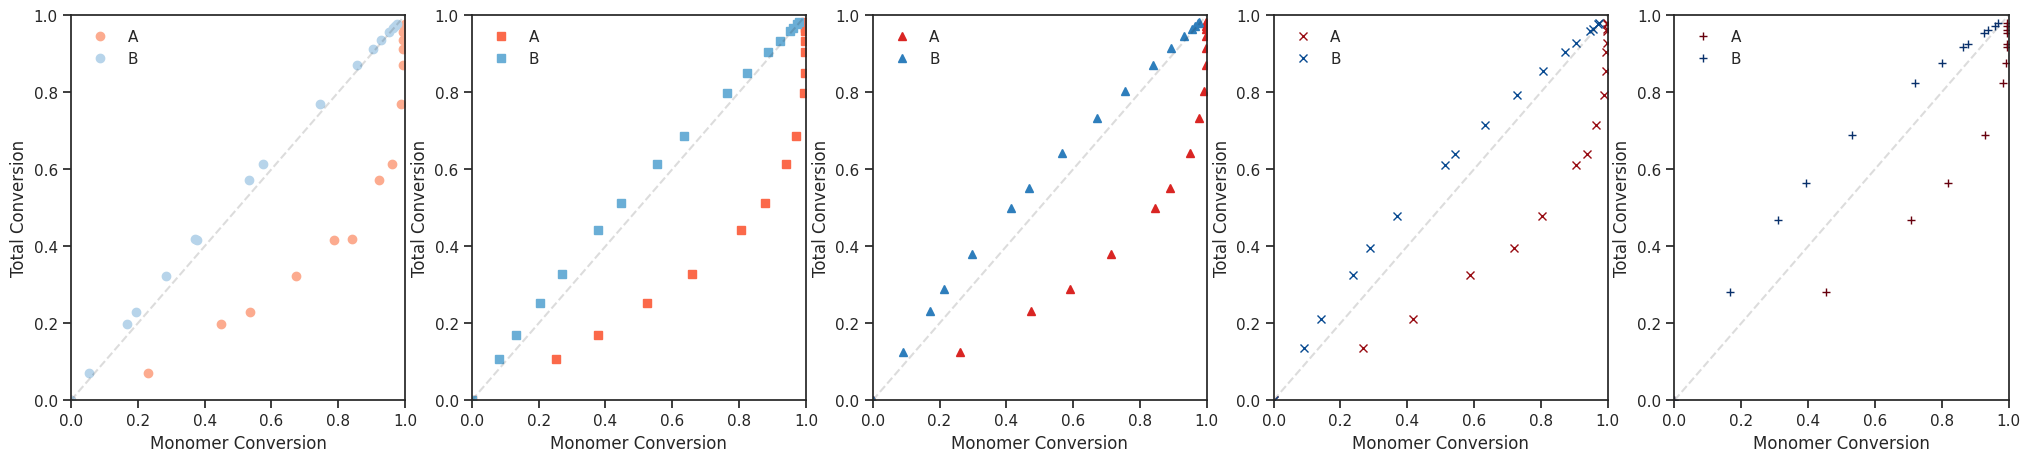

In [16]:
xdata_exp, ydata_exp = create_Lynd_v1.get_exp_data(data, metadata)
ax = create_Lynd_v1.plot_data(xdata_exp, ydata_exp, plot_style='markers')

# x_ = np.array([ 0.53121916, -0.55187497,  1.15132326,  0.        ,  0.        ,0.        ,  0])#,  1.67863391])
# xdata_exp, ydata_exp = create_Lynd_v1.cpe_model(data, metadata, log_r=x_)#result.optimize_result.x[0])
# create_Lynd_v1.plot_data(xdata_exp, ydata_exp, ax=ax, plot_style='lines')

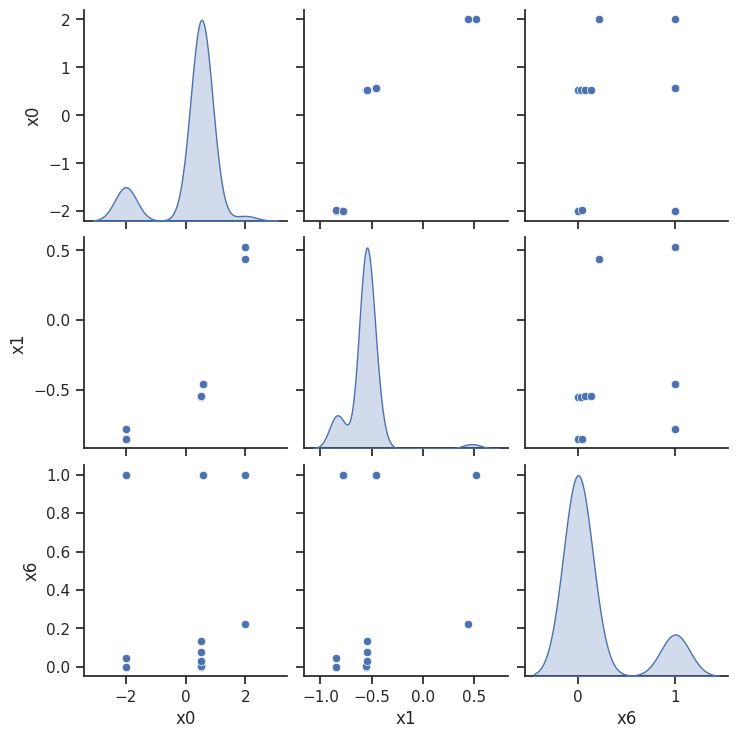

In [39]:
ax = visualize.optimization_scatter(result=results[0])

In [42]:
n_samples = 10000

sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), 
    n_chains=3,
)

# resul

result = sample.sample(
    problem, n_samples=n_samples, sampler=sampler, result=results[0], #x0=results[0].optimize_result.x[0],
)

Initializing betas with "near-exponential decay".
100%|█████████████████████████████████████| 10000/10000 [18:25<00:00,  9.05it/s]
Elapsed time: 1091.418285657


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


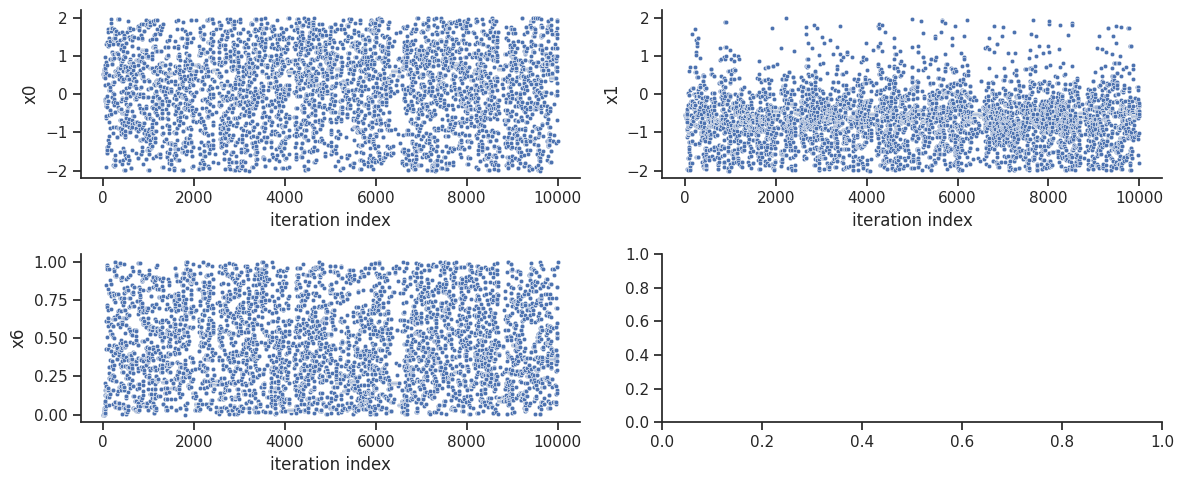

In [43]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)

In [48]:
sampres = result.sample_result
print(sampres.keys())
print(sampres['trace_x'].shape)
print(sampres['trace_neglogpost'].shape)
print(sampres['trace_neglogprior'].shape)

dict_keys(['trace_x', 'trace_neglogpost', 'trace_neglogprior', 'betas', 'burn_in', 'time', 'auto_correlation', 'effective_sample_size', 'message'])
(3, 10001, 3)
(3, 10001)
(3, 10001)


 ...]

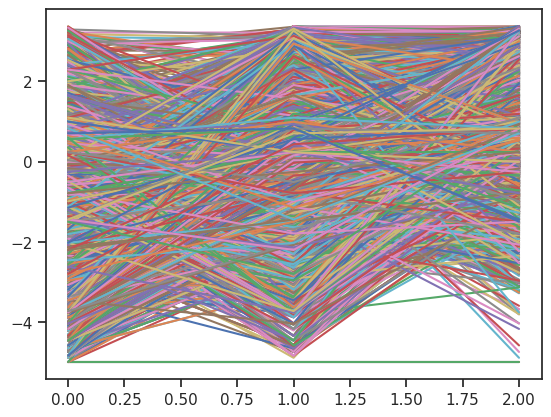

In [59]:
import matplotlib.pyplot as plt

plt.plot(sampres['trace_neglogpost'])

In [58]:
sampres['trace_x']

array([[[ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        ...,
        [ 1.21791723, -0.27390188,  0.53069403],
        [ 1.91707212, -0.50924521,  0.96536891],
        [-1.23624655, -0.24032199,  0.99897883]],

       [[ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        ...,
        [-1.23624655, -0.24032199,  0.99897883],
        [ 1.21791723, -0.27390188,  0.53069403],
        [ 1.91707212, -0.50924521,  0.96536891]],

       [[ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        [ 0.53121783, -0.55188912,  0.        ],
        ...,
        [ 1.91707212, -0.50924521,  0.96536891],
        [-1.23624655, -0.24032199,  0.99897883],
        [ 1.21791723, -0.27390188,  0.53069403]]])

In [57]:
sampres['trace_neglogprior']

array([[-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]])

<Axes: title={'center': 'Estimated parameters'}, xlabel='Parameter value', ylabel='Parameter'>

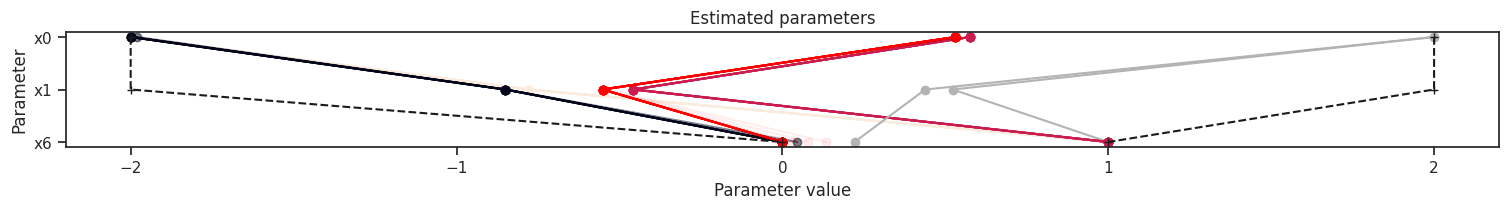

In [ ]:
visualize.parameters(result)

In [26]:
print(result.optimize_result.x[0])
print(10**result.optimize_result.x[0])
result.optimize_result.as_dataframe()

# get first 30 results
nm_result_df = results[0].optimize_result.as_dataframe().copy()
nm_result_df = nm_result_df[nm_result_df['fval'] < -4]
nm_result_df = nm_result_df.sort_values('fval')
nm_result_df.head(30)['x'].values

[ 0.50583271 -0.58402288  0.          0.0061105   1.          0.04536781
  0.1282457 ]
[ 3.20503451  0.26060162  1.          1.0141694  10.          1.11011459
  1.34352483]


array([array([ 0.50583271, -0.58402288,  0.        ,  0.0061105 ,  1.        ,
               0.04536781,  0.1282457 ])                                      ,
       array([ 0.50620648, -0.58407094,  0.        ,  0.0092264 ,  0.99873297,
               0.04487391,  0.12439024])                                      ,
       array([ 0.50527066, -0.58371839,  0.        ,  0.        ,  0.99917438,
               0.04597762,  0.13485209])                                      ,
       array([ 0.50676135, -0.58368275,  0.        ,  0.00986735,  0.98976466,
               0.04439381,  0.12118271])                                      ,
       array([ 0.50995246, -0.58329227,  0.        ,  0.0290812 ,  1.        ,
               0.0403491 ,  0.08648931])                                      ,
       array([ 0.50727872, -0.58392233,  0.        ,  0.01396071,  0.98550447,
               0.04392434,  0.11634235])                                      ,
       array([ 0.51084735, -0.58325493,  0.   

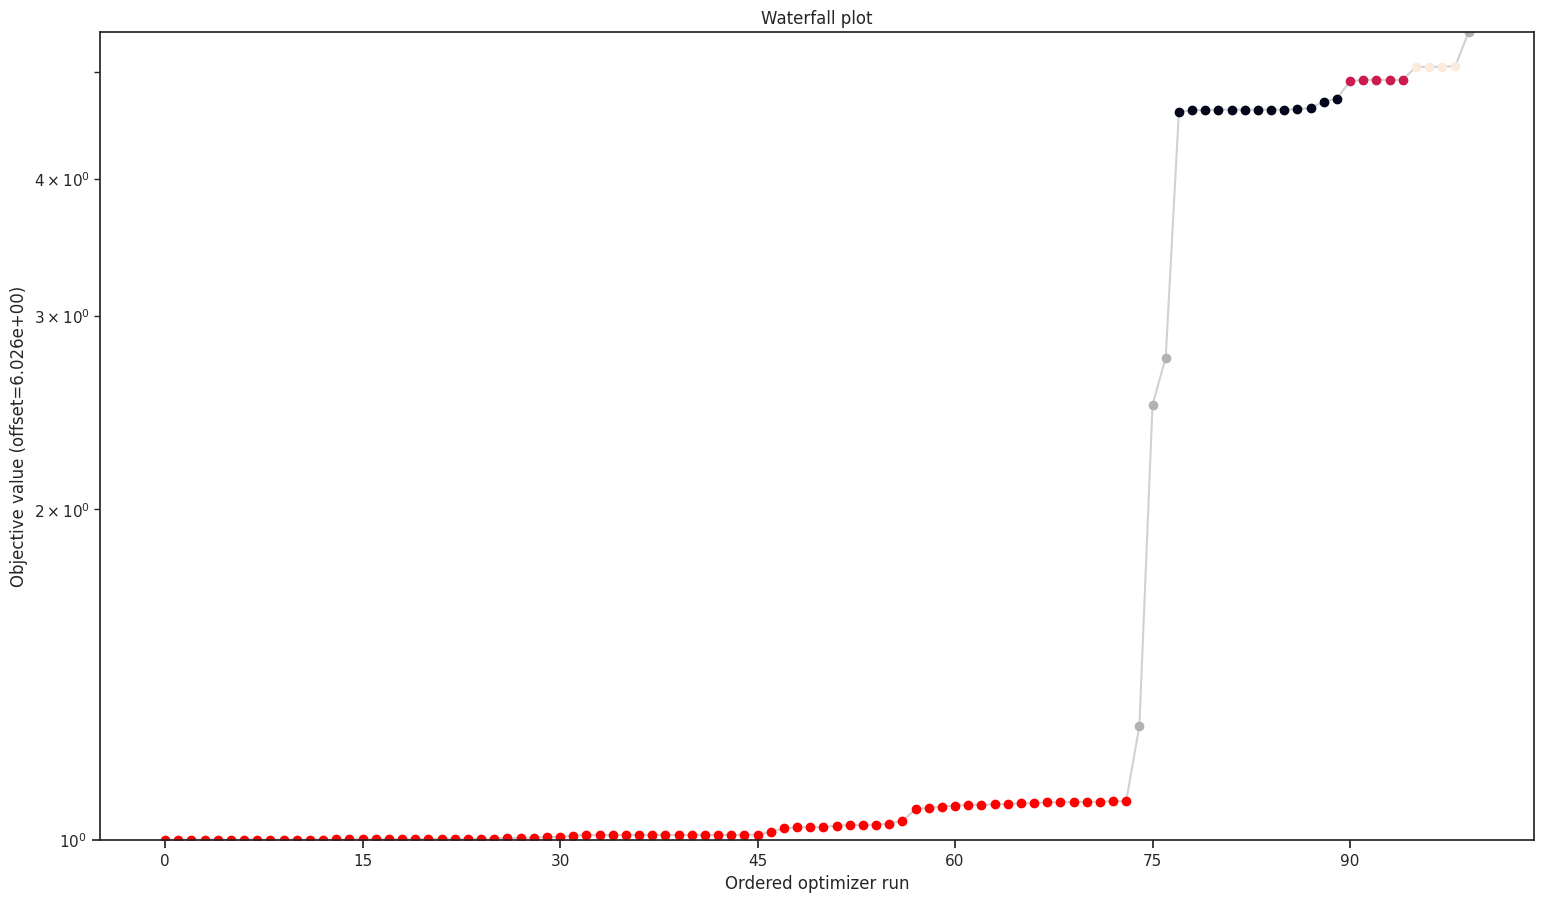

In [21]:
ax = visualize.waterfall(result)


In [ ]:
data_dir = '/SBML/PyPESTO/COMP/lynd_raw_data/'
data, metadata = create_Lynd_v1.get_plga_data(data_dir, indices=[0])
# create_Lynd_v1.write_petab_files(data, metadata, create_Lynd_v1.sbml_model_filepath())

In [ ]:
import logging

import numpy as np
import petab
import amici
import amici.plotting
import sys
import os
import importlib

import pypesto
import pypesto.optimize as optimize
import pypesto.petab
import pypesto.sample as sample
import pypesto.visualize as visualize

# log diagnostics
logger = logging.getLogger("pypesto.sample.diagnostics")
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler())

# import to petab
yaml_filepath = '/SBML/PyPESTO/FRP/Lynd_v1/Lynd_v1.yaml'
petab_problem = petab.Problem.from_yaml(
    yaml_filepath
)
# importer = pypesto.petab.PetabImporter(petab_problem, model_name=create_FRP_v1.MODEL_NAME)

importer = pypesto.petab.PetabImporter.from_yaml(
    yaml_filepath,
    model_name=create_Lynd_v1.MODEL_NAME,
)

# Works when it runs twice for some reason
try:
    problem = importer.create_problem(force_compile=True)
except:
    problem = importer.create_problem(force_compile=True)

In [ ]:
optimizer = optimize.ScipyOptimizer()
engine = pypesto.engine.MultiProcessEngine()
n_starts = 1000

# run optimization of problem 1
result = optimize.minimize(
    problem=problem, optimizer=optimizer, n_starts=n_starts, engine=engine
)

In [ ]:
import pypesto.visualize.model_fit as model_fit
import matplotlib.pyplot as plt 
ax = model_fit.visualize_optimized_model_fit(
    petab_problem=petab_problem, result=result1, pypesto_problem=problem,
    group_by='simulation',
    grouping_list=[
        ["c_0"],
        ["c_1"],
        ["c_2"],
        ["c_3"],
        ["c_4"],
    ],
)

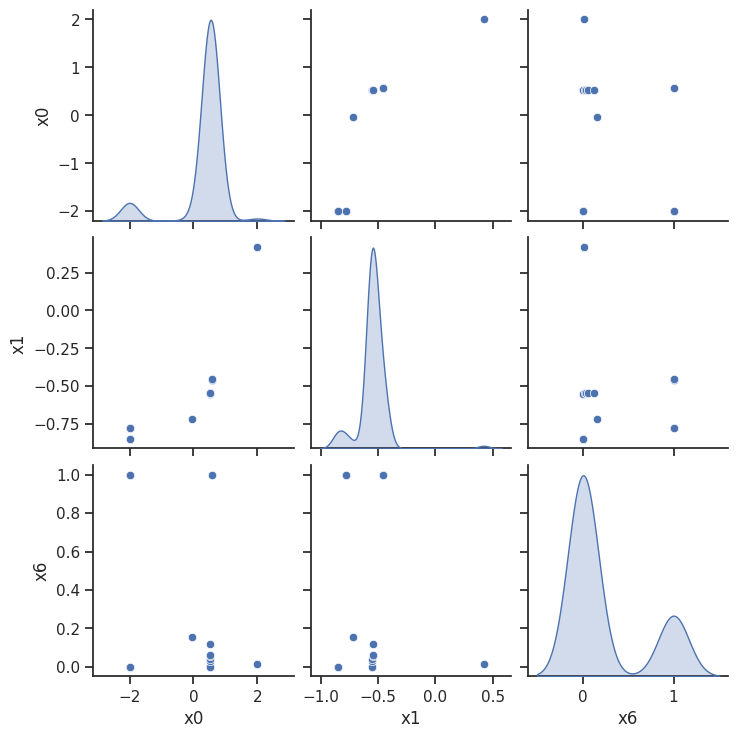

In [156]:
ax = visualize.optimization_scatter(result=result)


In [ ]:
print(result1.optimize_result.x[0])
print(10**result1.optimize_result.x[0])

In [ ]:
ax = visualize.optimization_scatter(result=result)


In [ ]:
pypesto.visualize.waterfall(result)

In [ ]:
result_df = result.optimize_result.as_dataframe().copy()
result_df[result_df['fval'] < -4]['x']

In [ ]:
result_df[]

In [ ]:
ax = visualize.optimization_scatter(result=result1)


In [ ]:
visualize.parameters(result1)



In [ ]:
np.log10(0.5)

In [ ]:
# %%time
# %%capture

import pypesto.profile as profile
profile_options = profile.ProfileOptions(
    min_step_size=0.0001,
    delta_ratio_max=0.001,
    default_step_size=0.005,
    ratio_min=0.001,
    whole_path=True
)

optimizer_scipy_lbfgsb = optimize.ScipyOptimizer(method="Nelder-Mead")
result = profile.parameter_profile(
    problem=problem,
    result=results[1],
    profile_options=profile_options,
    optimizer=optimizer_scipy_lbfgsb,
    profile_index=[0]
)

  0%|                                                     | 0/1 [38:57<?, ?it/s]


KeyboardInterrupt: 

In [117]:
np.array(prof_res['x_path'][0])

array([-2.        , -1.53750659, -0.53750659,  0.04377274,  0.22800755,
        0.32001911,  0.37442009,  0.41123054,  0.43754131,  0.45690686,
        0.47217404,  0.48459624,  0.49436502,  0.50255225,  0.50978801,
        0.51691637,  0.52547209,  0.53121916,  0.54179012,  0.54798636,
        0.55496563,  0.56257615,  0.5716787 ,  0.5829837 ,  0.59702713,
        0.6149026 ,  0.61988646,  0.62553218,  0.64797975,  0.66681248,
        0.70956388,  0.72334723,  0.7419846 ,  0.82502556,  0.89102165,
        1.11170418,  1.94007265,  2.        ])

In [118]:
prof_res = result.profile_result.get_profiler_result(0)
print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][0], prof_res['ratio_path'], confidence_ratio=0.95)))
# print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][1], prof_res['ratio_path'], confidence_ratio=0.95)))
# print(np.array(profile.calculate_approximate_ci(prof_res['x_path'][6], prof_res['ratio_path'], confidence_ratio=0.95)))

# prof_res = result.profile_result.get_profiler_result(1)
# # print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][0], prof_res['ratio_path'], confidence_ratio=0.95)))
# print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][1], prof_res['ratio_path'], confidence_ratio=0.95)))
# # print(np.array(profile.calculate_approximate_ci(prof_res['x_path'][6], prof_res['ratio_path'], confidence_ratio=0.95)))

# prof_res = result.profile_result.get_profiler_result(6)
# # print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][0], prof_res['ratio_path'], confidence_ratio=0.95)))
# # print(10**np.array(profile.calculate_approximate_ci(prof_res['x_path'][1], prof_res['ratio_path'], confidence_ratio=0.95)))
# print(np.array(profile.calculate_approximate_ci(prof_res['x_path'][6], prof_res['ratio_path'], confidence_ratio=0.95)))

[3.11181592 3.68679017]


[<Axes: xlabel='x0', ylabel='Log-posterior ratio'>,
 <Axes: xlabel='x1'>,
 <Axes: xlabel='x6', ylabel='Log-posterior ratio'>]

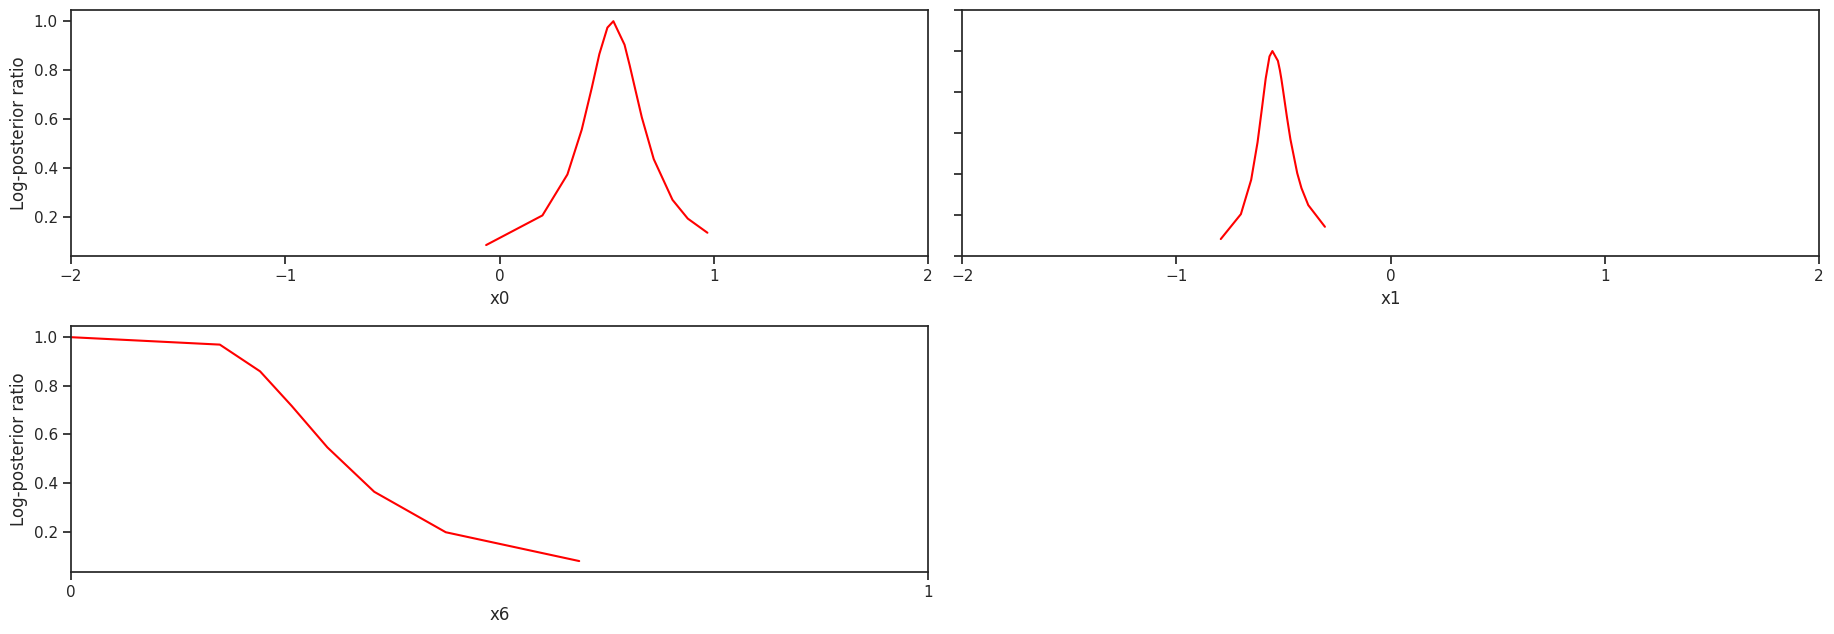

In [119]:
visualize.profiles(result, show_bounds=True)

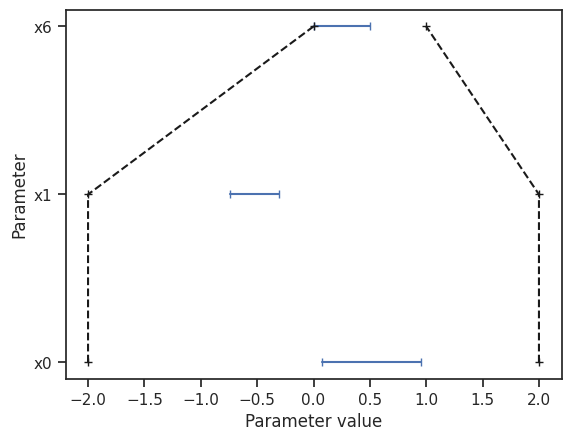

In [71]:
ax = pypesto.visualize.profile_cis(
    result, confidence_level=0.95, show_bounds=True
)

In [41]:
n_samples = 10000

sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), 
    n_chains=3,
)

# resul

result = sample.sample(
    problem, n_samples=n_samples, sampler=sampler, result=result1, #x0=results[0].optimize_result.x[0],
)

Initializing betas with "near-exponential decay".


NameError: name 'result1' is not defined

result.optimize_result

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1223: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, _ = get_data_to_plot(
/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1293: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


array([[<Axes: xlabel='x0', ylabel='Density'>,
        <Axes: xlabel='x1', ylabel='Density'>],
       [<Axes: xlabel='x6', ylabel='Density'>, <Axes: >]], dtype=object)

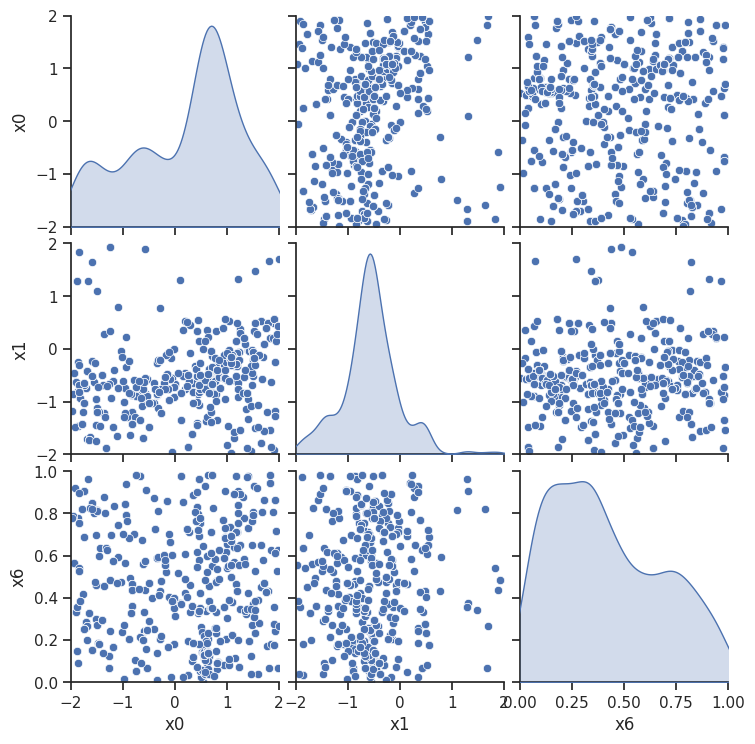

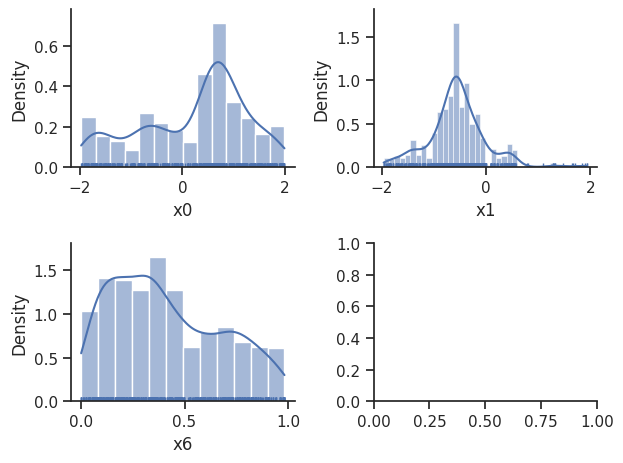

In [65]:
# scatter plots
visualize.sampling_scatter(result)

# marginals
visualize.sampling_1d_marginals(result)

In [27]:
sampler = sample.AdaptiveParallelTemperingSampler(
    internal_sampler=sample.AdaptiveMetropolisSampler(), 
    n_chains=3,
)

Initializing betas with "near-exponential decay".


In [ ]:
# %%capture
sampler = sample.MetropolisSampler()
n_samples = 40_000
result = sample.sample(
    problem,
    n_samples=n_samples,
    sampler=sampler,
    x0=np.result
    # x0=np.array([
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     np.log(1),
    #     # np.log(4.5),
    #     # np.log(0.32),
    #     # np.log(1),
    #     # np.log(0.15),
    #     # np.log(1),
    # ]),
    result=result,
    filename=None,
)
elapsed_time = result.sample_result.time
print(f"Elapsed time: {round(elapsed_time,2)}")

100%|█████████████████████████████████████| 40000/40000 [18:18<00:00, 36.42it/s]
Elapsed time: 1085.5686412940004


Elapsed time: 1085.57


/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1223: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, _ = get_data_to_plot(


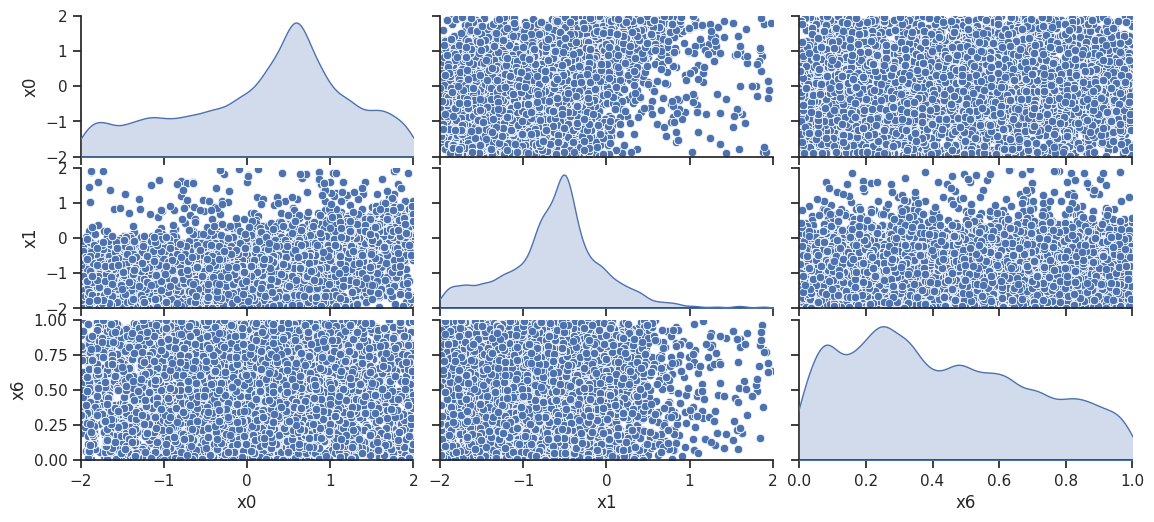

In [30]:
ax = visualize.sampling_scatter(
    result, size=(12, 5),
    # par_indices=[0,1,2,3]
)

In [ ]:
visualize.sampling_1d_marginals(result1)

In [ ]:
ax = visualize.sampling_parameter_cis(
    result, size=(12, 5),
    alpha=[99, 95, 90]
    # par_indices=[0,1,2,3]
)

In [72]:
np.exp(sample.calculate_ci_mcmc_sample(results[0], ci_level=0.95))

AttributeError: 'SampleResult' object has no attribute 'burn_in'

In [ ]:
np.exp(sample.calculate_ci_mcmc_sample(result1, ci_level=0.95))

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1117: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


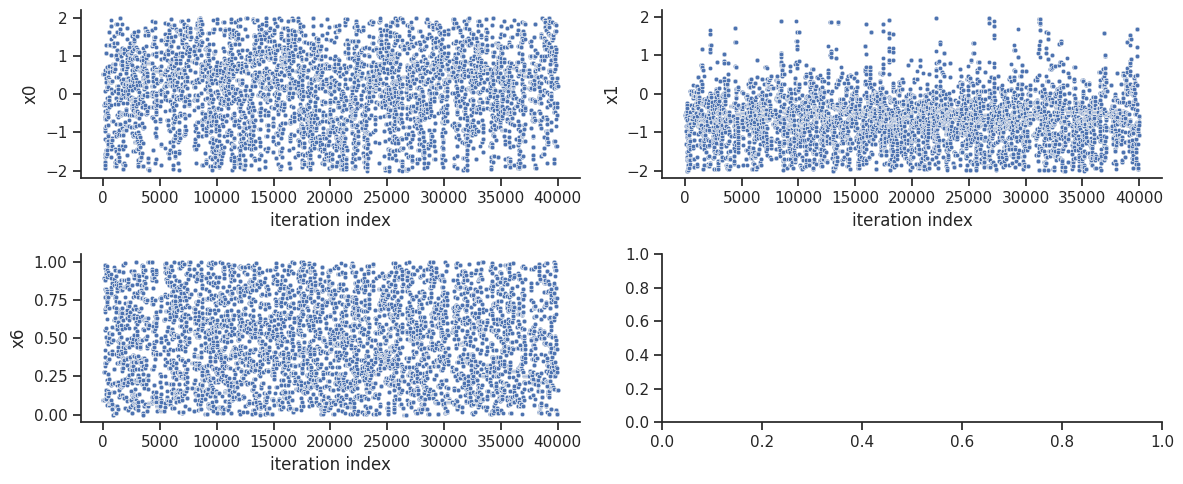

In [31]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    # par_indices=[0,1,2,3]
)

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")

# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# # ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([0, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([0, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")


In [ ]:
it_start = sample.geweke_test(result=result)
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=False, size=(12, 5),
    par_indices=[0,1,2,3]
)
ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
ax[1][0].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
ax[1][1].plot([0, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[0][0].plot([it_start, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([it_start, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([it_start, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([it_start, n_samples], np.log([KBB_true, KBB_true]), "k--")
# ax[1][1].plot([it_start, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][2].plot([it_start, n_samples], np.log([kp_kt_ratio_true, kp_kt_ratio_true]), "k--")
# ax[2][0].plot([it_start, n_samples], np.log([kd_kt_true, kd_kt_true]), "k--")

In [ ]:
ax = visualize.sampling_parameter_traces(
    result, use_problem_bounds=True, full_trace=True, size=(10, 4),
    par_indices=[0,1,2,3]
)
# ax[0][0].plot([0, n_samples], np.log([rA_true, rA_true]), "k--")
# ax[0][1].plot([0, n_samples], np.log([rB_true, rB_true]), "k--")
# ax[0][2].plot([0, n_samples], np.log([rX_true, rX_true]), "k--")
# ax[1][0].plot([0, n_samples], np.log([kpAA_true, kpAA_true]), "k--")
# ax[1][1].plot([0, n_samples], np.log([kt_true, kt_true]), "k--")

In [ ]:
alpha = [99, 95, 90]
import matplotlib.pyplot as plt
ax = visualize.sampling_parameter_cis(result, alpha=alpha, size=(10, 5))
line1, = ax.plot([np.log(rA_true)], 0, 'o', color='tab:red')
line2, = ax.plot([np.log(rB_true)], 1, 'o', color='tab:red')
line3, = ax.plot([np.log(rX_true)], 2, 'o', color='tab:red')
line4, = ax.plot([np.log(KBB_true)], 3, 'o', color='tab:red')
line5, = ax.plot([np.log(kpAA_true)], 4, 'o', color='tab:red')
line6, = ax.plot([np.log(kp_kt_ratio_true)], 5, 'o', color='tab:red')
line7, = ax.plot([np.log(kd_kt_true)], 6, 'o', color='tab:red')
# line4, = ax.plot([np.log(kpAA_true)], 3, 'o', color='tab:red')
# line5, = ax.plot([np.log(kt_true)], 4, 'o', color='tab:red')

# ax.legend()
# Get existing legend handles and labels
handles, labels = ax.get_legend_handles_labels()

unique_handles_labels = list(dict(zip(labels, handles)).items())
unique_labels, unique_handles = zip(*unique_handles_labels)

# Update the legend with unique handles and labels
ax.legend(unique_handles, unique_labels)
ax.set_yticks([0,1,2,3,4,5,6],['$r_{A}$', '$r_{B}$', '$r_{X}$', '$K_{BB}$', '$k_{pAA}$', '${k_{pAA}}{k_{t}}^{-1}$', '${k_{d}}{k_{t}}$'])
ax.set_xlabel('parameter value')
ax.set_ylabel('')
# ax.set_xlim(-5, 5)
plt.show()
# ax.vlines(np.log([k1_true, k2_true]), 0, 1, color="k", linestyle="--")

In [ ]:
np.exp(sample.calculate_ci_mcmc_sample(result1, ci_level=0.6827))

/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1293: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(
/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1293: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(
/usr/local/lib/python3.10/dist-packages/pypesto/visualize/sampling.py:1293: UserWarning: Burn in index not found in the results, the full chain will be shown.
You may want to use, e.g., `pypesto.sample.geweke_test`.
  nr_params, params_fval, theta_lb, theta_ub, param_names = get_data_to_plot(


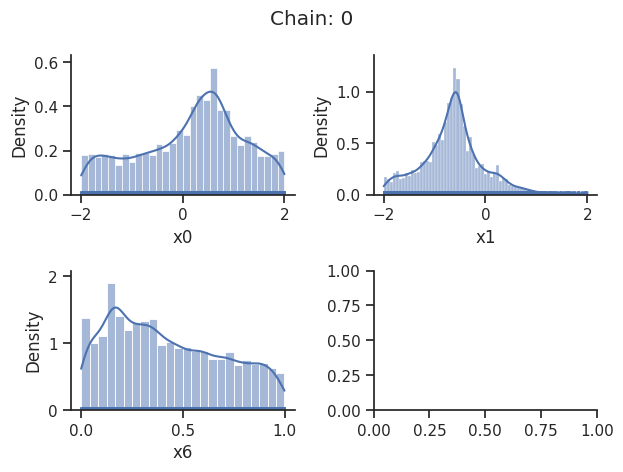

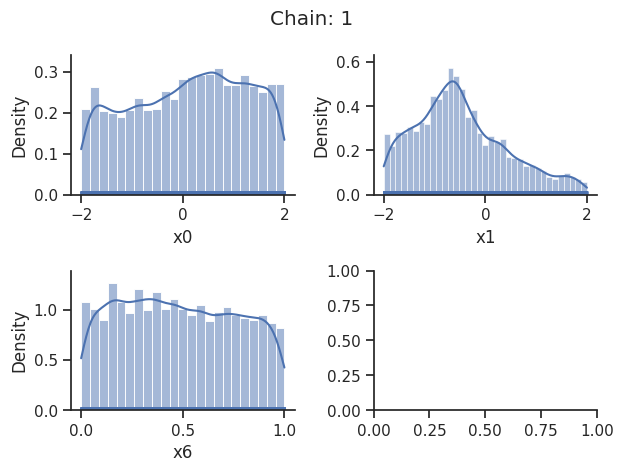

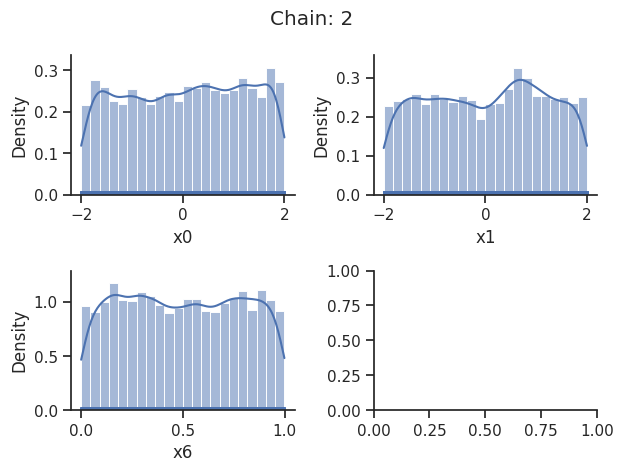

In [15]:
for i_chain in range(len(result.sample_result.betas)):
    ax = visualize.sampling_1d_marginals(
        result, i_chain=i_chain, suptitle=f"Chain: {i_chain}"
    )
    
    # y_max_00 = ax[0][0].get_ylim()[1]
    # y_max_01 = ax[0][1].get_ylim()[1]
    # y_max_02 = ax[0][2].get_ylim()[1]
    # y_max_10 = ax[1][0].get_ylim()[1]
    # y_max_11 = ax[1][1].get_ylim()[1]
    # y_max_12 = ax[1][2].get_ylim()[1]
    # y_max_20 = ax[2][0].get_ylim()[1]
    
    # ax[0][0].vlines(np.log(rA_true),   0, y_max_00, color="tab:red", linestyle="--")
    # ax[0][1].vlines(np.log(rB_true),   0, y_max_01, color="tab:red", linestyle="--")
    # ax[0][2].vlines(np.log(rX_true),   0, y_max_02, color="tab:red", linestyle="--")
    # ax[1][0].vlines(np.log(KBB_true),  0, y_max_10, color="tab:red", linestyle="--")
    # ax[1][1].vlines(np.log(kpAA_true), 0, y_max_11, color="tab:red", linestyle="--")
    # ax[1][2].vlines(np.log(kp_kt_ratio_true), 0, y_max_12, color="tab:red", linestyle="--")
    # ax[2][0].vlines(np.log(kd_kt_true), 0, y_max_20, color="tab:red", linestyle="--")

In [ ]:
# kAA, kAB, kAC
# kBA, kBB, kBC
# kCA, kCB, kCC


# rAA = kAA / kAA = 1
# rAB = kAA / kAB
# rAC = kAA / kAC

# rBA = kBB / kBA
# rBB = kBB / kBB = 1
# rBC = kBB / kBC

# rCA = kCC / kCA
# rCB = kCC / kCB
# rCC = kCC / kCC = 1


In [ ]:
from pypesto.C import AMICI_STATUS, AMICI_T, AMICI_X, AMICI_Y
from pypesto.predict import AmiciPredictor


# This post_processor will transform the output of the simulation tool
# such that the output is compatible with the next steps.
def post_processor(amici_outputs, output_type, output_ids):
    outputs = [
        (
            amici_output[output_type]
            if amici_output[AMICI_STATUS] == 0
            else np.full((len(amici_output[AMICI_T]), len(output_ids)), np.nan)
        )
        for amici_output in amici_outputs
    ]
    return outputs


# Setup post-processors for both states and observables.
from functools import partial

amici_objective = result.problem.objective
state_ids = amici_objective.amici_model.getStateIds()
observable_ids = amici_objective.amici_model.getObservableIds()
post_processor_x = partial(
    post_processor,
    output_type=AMICI_X,
    output_ids=state_ids,
)
post_processor_y = partial(
    post_processor,
    output_type=AMICI_Y,
    output_ids=observable_ids,
)

# Create pyPESTO predictors for states and observables
predictor_x = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_x,
    output_ids=state_ids,
)
predictor_y = AmiciPredictor(
    amici_objective,
    post_processor=post_processor_y,
    output_ids=observable_ids,
)

from pypesto.C import EnsembleType
from pypesto.ensemble import Ensemble

# corresponds to only the estimated parameters
x_names = result.problem.get_reduced_vector(result.problem.x_names)

# Create the ensemble with the MCMC chain from parallel tempering with the real temperature.
ensemble = Ensemble.from_sample(
    result,
    chain_slice=slice(
        None, None, 5
    ),  # Optional argument: only use every fifth vector in the chain.
    x_names=x_names,
    ensemble_type=EnsembleType.sample,
    lower_bound=result.problem.lb,
    upper_bound=result.problem.ub,
)

In [ ]:
from pypesto.engine import MultiProcessEngine

engine = MultiProcessEngine()

ensemble_prediction = ensemble.predict(
    predictor_x, prediction_id=AMICI_X, engine=engine
)
from pypesto.C import CONDITION, OUTPUT

credibility_interval_levels = [90, 95, 99]

ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(10, 5),
    # labels={"A": "state_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=CONDITION,
    # condition_ids=["condition_0", "condition_1", "condition_2"],  # `None` for all conditions
    # output_ids=["A", "B"],  # `None` for all outputs
)

In [ ]:
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    size=(20, 10),
    # labels={"A": "obs_A", "condition_0": "cond_0"},
    axis_label_padding=60,
    groupby=OUTPUT,
)

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
def show_measurement_fit(petab_problem, engine):


    mdf = petab_problem.measurement_df
    # Create a custom objective with new output timepoints.
    conditions = mdf[SIMULATION_CONDITION_ID].unique()
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique() for c in conditions]
    # timepoints = [np.array([5.04038772,10.08077544,29.8546042 ,60.09693053,119.80613893, 240.38772213])]
    # print(timepoints)
    # timepoints = np.arange(min(timepoints[0]), max(timepoints), 0.1)
    # print(timepoints)
    # amici_objective_custom = amici_objective.set_custom_timepoints(
    #     timepoints=timepoints
    # )

    # Create an observable predictor with the custom objective.
    predictor_y_custom = AmiciPredictor(
        amici_objective,
        post_processor=post_processor_y,
        output_ids=observable_ids,
        condition_ids=[edata.id for edata in amici_objective.edatas],
    )

    # Predict then plot.
    ensemble_prediction = ensemble.predict(
        predictor_y_custom, prediction_id=AMICI_Y, engine=engine
    )

    ax = visualize.sampling_prediction_trajectories(
        ensemble_prediction,
        levels=credibility_interval_levels,
        groupby=CONDITION,
        measurement_df=mdf,
        size=(12,6),
    )
    
    return ax
# import matplotlib.pyplot as plt
# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# # ax[1][1].set_title('')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

ax = show_measurement_fit(petab_problem, engine)
plt.tight_layout()
fig = ax[0][0].get_figure()
fig.savefig('FRP2_measurement_fit.png')
plt.show()

In [ ]:
from petab.v1.C import PARAMETER_ID, PARAMETER_SCALE, LOWER_BOUND, UPPER_BOUND, NOMINAL_VALUE, ESTIMATE, OBSERVABLE_ID, SIMULATION_CONDITION_ID, TIME, MEASUREMENT, OBSERVABLE_FORMULA, NOISE_FORMULA, LOG, CONDITION_ID, CONDITION_NAME, FORMAT_VERSION, PARAMETER_FILE, PROBLEMS, SBML_FILES, CONDITION_FILES, MEASUREMENT_FILES, OBSERVABLE_FILES
mdf = petab_problem.measurement_df
mdf

# count the number of observables in mdf


# get the timepoints for each condition


# for c in conditions:
#     timepoints = mdf[mdf[SIMULATION_CONDITION_ID] == c][TIME].unique()
#     print(timepoints)
    
# Convert into list comprehension

print(timepoints)

In [ ]:
mdf

In [ ]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax = visualize.sampling_prediction_trajectories(
    ensemble_prediction,
    levels=credibility_interval_levels,
    groupby=CONDITION,
    measurement_df=mdf,
    # axes=ax,
)
# plt.tight_layout()

# ax[0][0].set_title('')
# ax[1][0].set_title('')
# ax[0][1].set_title('')
# ax[1][1].set_title('')
# ax[0].set_ylim([-0.1, 2.5])
# ax[1].set_ylim([-0.1, 2.5])
# ax[2].set_ylim([-0.1, 2.5])
# # fig.set_title('')
# ax[0].set_xlabel('Time (s)')
# ax[1].set_xlabel('Time (s)')
# ax[2].set_xlabel('Time (s)')
# ax[0].set_ylabel('Simulated Concentration (M)')
# ax[0][0].set_ylim([-0.1, 2.1])
# ax[1][0].set_ylim([-0.1, 2.1])
# ax[0][1].set_ylim([-0.1, 2.1])
# ax[1][1].set_ylim([-0.1, 2.1])

plt.show()

mdf